In [53]:
! pip install plotly

In [54]:
from pandas_datareader.data import DataReader
from datetime import datetime
from IPython.display import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [55]:
tech_list = ['TCS.NS','LTI.NS','MINDTREE.NS','INFY.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2014, 1, 1)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    variable_name = stock.replace('.NS', '')
    globals()[variable_name.lower()] = DataReader(stock, 'yahoo', start, end)

In [56]:
company_list = [tcs, lti, mindtree, infy]

Text(0.5, 1.0, 'Infosys')

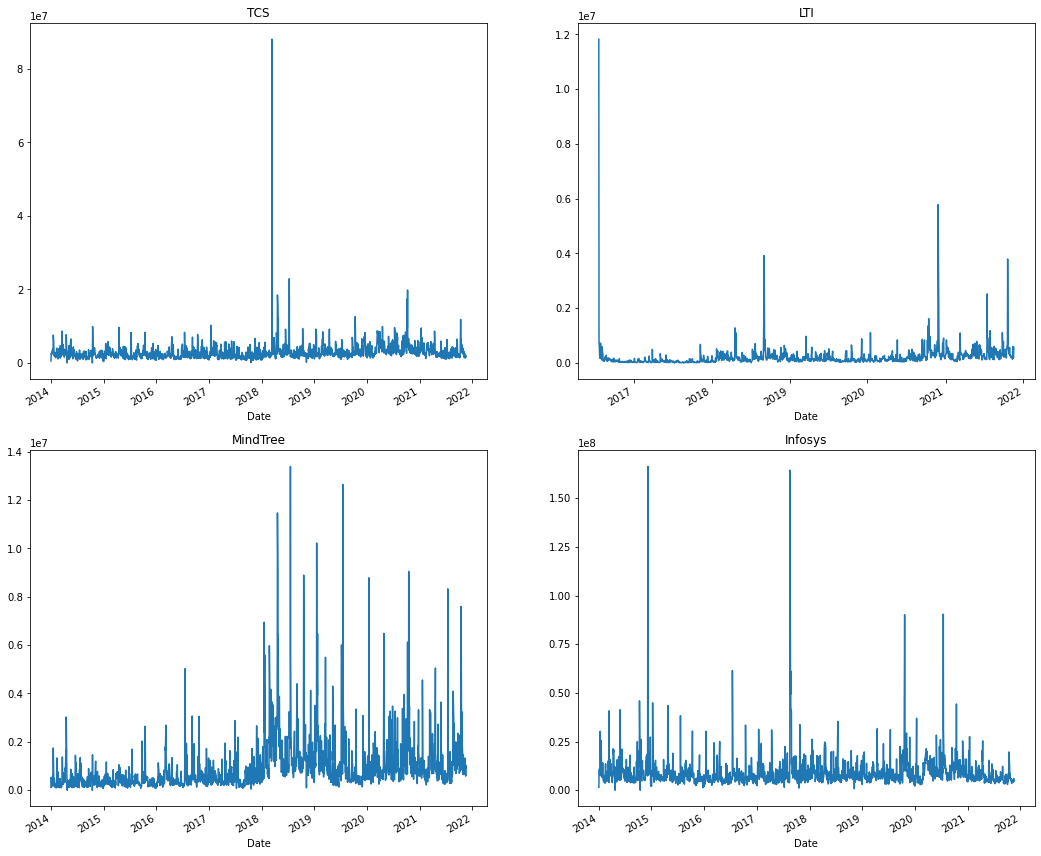

<Figure size 1080x432 with 0 Axes>

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,16))
plt.title('Closing')
plt.figure(figsize=(15, 6))
tcs['Volume'].plot(ax=axes[0,0])
axes[0, 0].set_title("TCS")
lti['Volume'].plot(ax=axes[0,1])
axes[0, 1].set_title("LTI")
mindtree['Volume'].plot(ax=axes[1,0])
axes[1, 0].set_title("MindTree")
infy['Volume'].plot(ax=axes[1,1])
axes[1, 1].set_title("Infosys")

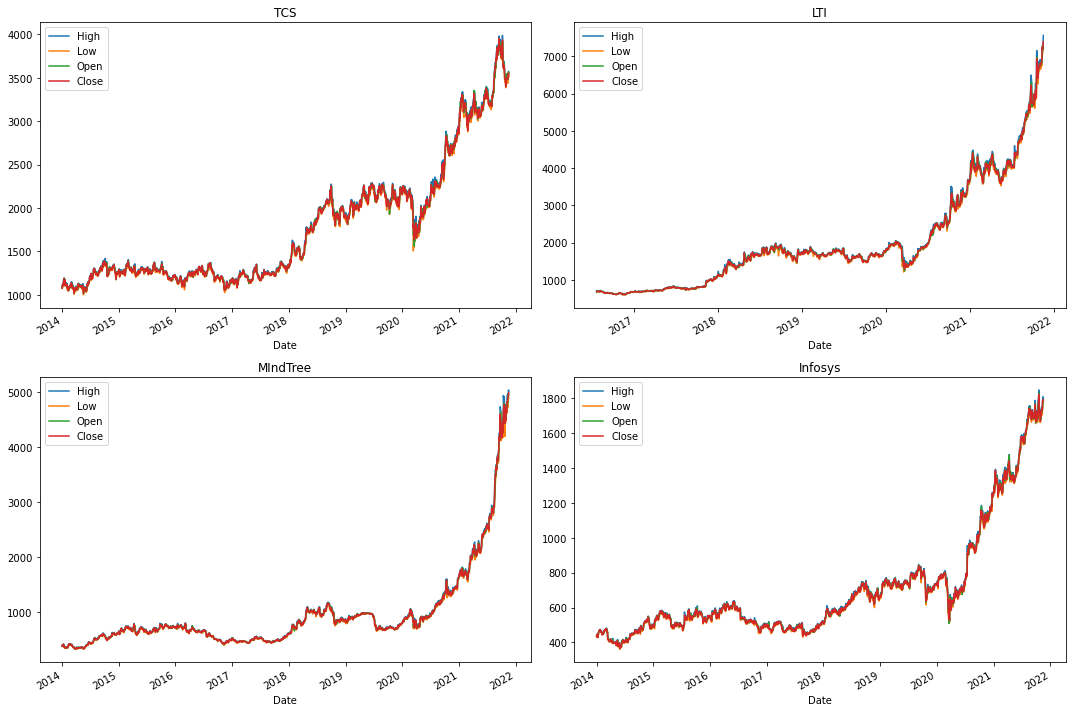

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

tcs[["High", "Low", "Open", "Close"]].plot(ax=axes[0,0])
axes[0,0].set_title("TCS")

lti[["High", "Low", "Open", "Close"]].plot(ax=axes[0,1])
axes[0,1].set_title("LTI")

mindtree[["High", "Low", "Open", "Close"]].plot(ax=axes[1,0])
axes[1,0].set_title('MIndTree')

infy[["High", "Low", "Open", "Close"]].plot(ax=axes[1,1])
axes[1,1].set_title("Infosys")

fig.tight_layout()

In [59]:
# Calculate Moving Averages for 10, 20, 50 Days

ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

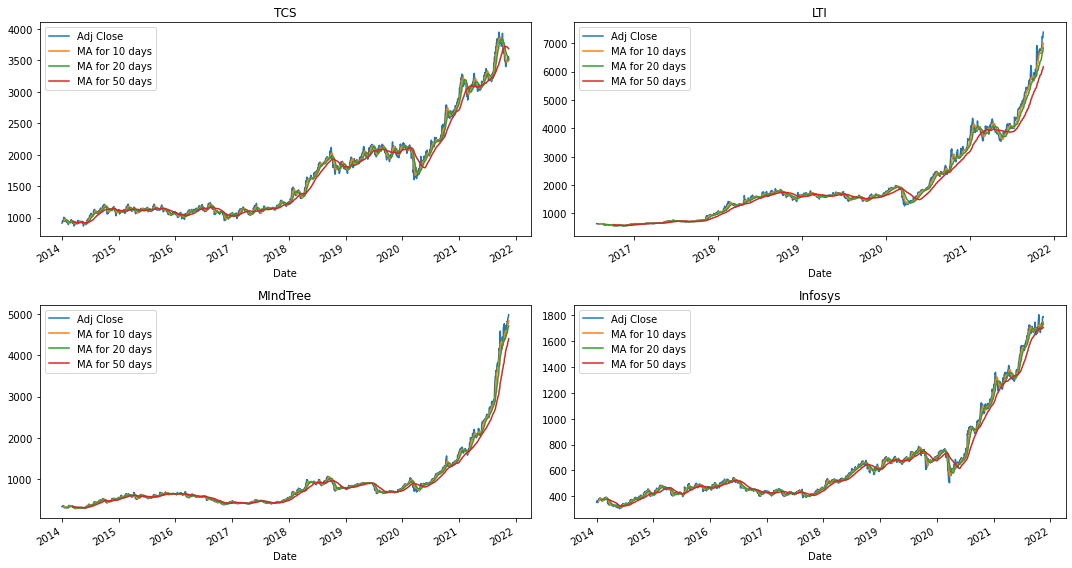

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

tcs[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("TCS")

lti[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("LTI")

mindtree[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title('MIndTree')

infy[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("Infosys")

fig.tight_layout()

In [61]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()  

Symbols,TCS.NS,LTI.NS,MINDTREE.NS,INFY.NS
Date,,,,
2014-01-01,914.562683,NaN,329.115784,354.276459
2014-01-02,920.381409,NaN,331.176514,355.558533
2014-01-03,943.826538,NaN,339.759125,364.200958
2014-01-06,951.216553,NaN,338.994354,359.374023
2014-01-07,937.009705,NaN,336.020142,353.168091


In [62]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,TCS.NS,LTI.NS,MINDTREE.NS,INFY.NS
Date,,,,
2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,0.006362,NaN,0.006261,0.003619
2014-01-03,0.025473,NaN,0.025916,0.024307
2014-01-06,0.007830,NaN,-0.002251,-0.013253
2014-01-07,-0.014935,NaN,-0.008774,-0.017269


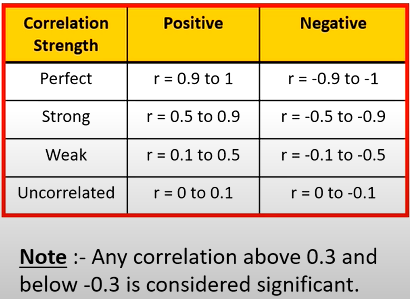

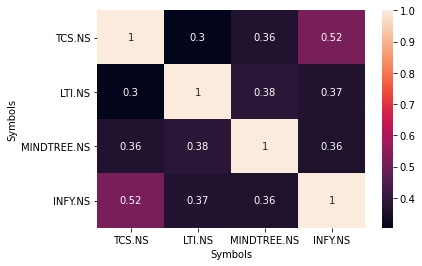

In [63]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='rocket')
Image(filename='corr.png') 

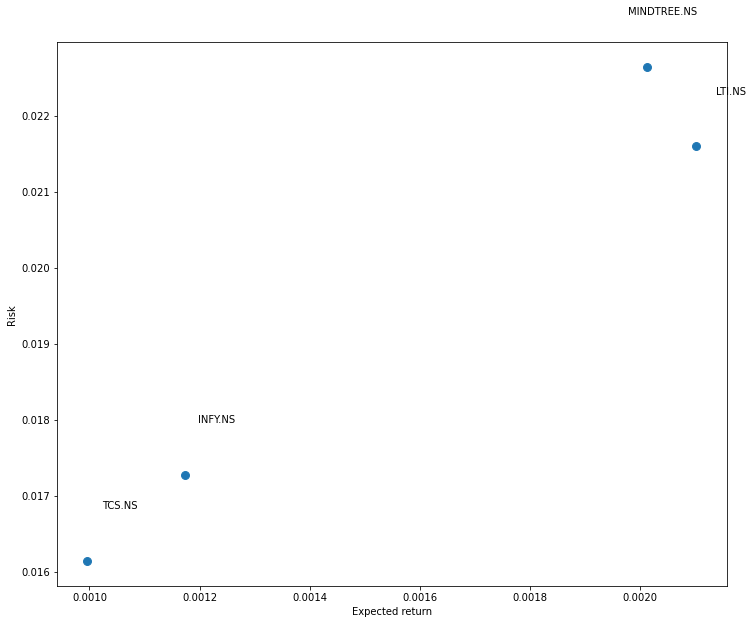

In [64]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom')

In [123]:
tcs['Date'] = pd.to_datetime(tcs.index, format='%Y-%m-%d')

y_overall = tcs.loc[(tcs['Date'] >= '2014-04-01')
                     & (tcs['Date'] <= '2021-11-14')]

y_overall=y_overall[['Open','High','Low','Close']]
monthvise= y_overall.groupby(y_overall.index.month)[['Open','High','Low','Close']].mean()
monthvise

,Open,High,Low,Close
Date,,,,
1,1755.252997,1773.167830,1735.690667,1754.872678
2,1775.236027,1795.079777,1751.741546,1770.981990
3,1727.959150,1753.763375,1705.305111,1729.658805
4,1685.296689,1705.532779,1663.798850,1684.894539
5,1708.844345,1726.223212,1690.119497,1707.862946
6,1782.857795,1799.990291,1766.309266,1783.630446
7,1817.617566,1834.893571,1799.244580,1816.861712
8,1886.430721,1904.735241,1869.663862,1887.847435
9,1942.604135,1962.407814,1920.774393,1940.851066


<AxesSubplot:xlabel='Date'>

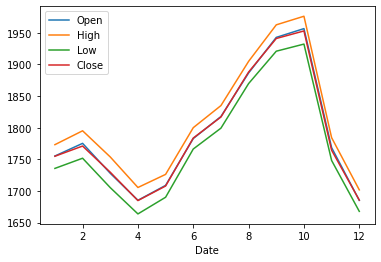

In [125]:


monthvise[["Open", "High", "Low", "Close"]].plot()

Considering Data after Mar 2020 due to drastic change due to covid

Machine Learning

In [96]:
tcs_close = tcs[['Close']]
tcs_close = tcs_close[tcs_close.index > '2015-04-01']

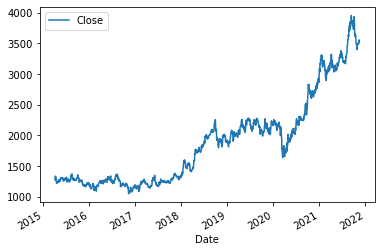

In [97]:

tcs_close[["Close"]].plot()
axes[0,0].set_title("TCS")
original_df = tcs_close.copy()

In [98]:
print("Input for prediction: ",tcs_close.shape[0])

Input for prediction:  1632


In [99]:
scaler=MinMaxScaler(feature_range=(0,1))
tcs_close=scaler.fit_transform(np.array(tcs_close).reshape(-1,1))
print(tcs_close.shape)

(1632, 1)


In [100]:
training_size=int(len(tcs_close)*0.85) # 85 percent train
test_size=len(tcs_close)-training_size
train_data,test_data=tcs_close[0:training_size,:],tcs_close[training_size:len(tcs_close),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1387, 1)
test_data:  (245, 1)


In [101]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [102]:


time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1371, 15)
y_train:  (1371,)
X_test:  (229, 15)
y_test (229,)


In [103]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1371, 15, 1)
X_test:  (229, 15, 1)


In [104]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [105]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
43/43 [==============================] - 1s 9ms/step - loss: 0.0238 - val_loss: 0.1754
Epoch 2/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0584
Epoch 3/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0129
Epoch 4/200
43/43 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0103
Epoch 5/200
43/43 [==============================] - 0s 5ms/step - loss: 5.0889e-04 - val_loss: 0.0380
Epoch 6/200
43/43 [==============================] - 0s 5ms/step - loss: 3.9022e-04 - val_loss: 0.0300
Epoch 7/200
43/43 [==============================] - 0s 5ms/step - loss: 3.4703e-04 - val_loss: 0.0190
Epoch 8/200
43/43 [==============================] - 0s 5ms/step - loss: 3.3372e-04 - val_loss: 0.0132
Epoch 9/200
43/43 [==============================] - 0s 5ms/step - loss: 3.2281e-04 - val_loss: 0.0136
Epoch 10/200
43/43 [==============================] - 0s 5ms/step - loss: 3.2233e-04 - va

43/43 [==============================] - 0s 5ms/step - loss: 1.3415e-04 - val_loss: 3.1883e-04
Epoch 79/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3369e-04 - val_loss: 3.3394e-04
Epoch 80/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3821e-04 - val_loss: 4.6744e-04
Epoch 81/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3297e-04 - val_loss: 3.2647e-04
Epoch 82/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3338e-04 - val_loss: 2.8861e-04
Epoch 83/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3221e-04 - val_loss: 2.8541e-04
Epoch 84/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3112e-04 - val_loss: 3.0236e-04
Epoch 85/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3156e-04 - val_loss: 3.6041e-04
Epoch 86/200
43/43 [==============================] - 0s 5ms/step - loss: 1.3213e-04 - val_loss: 2.8803e-04
Epoch 87/200
43/43 [=====================

Epoch 154/200
43/43 [==============================] - 0s 6ms/step - loss: 1.0577e-04 - val_loss: 5.8380e-04
Epoch 155/200
43/43 [==============================] - 0s 6ms/step - loss: 1.0941e-04 - val_loss: 5.8498e-04
Epoch 156/200
43/43 [==============================] - 0s 6ms/step - loss: 1.0912e-04 - val_loss: 4.8206e-04
Epoch 157/200
43/43 [==============================] - 0s 6ms/step - loss: 1.0768e-04 - val_loss: 6.7657e-04
Epoch 158/200
43/43 [==============================] - 0s 6ms/step - loss: 1.0331e-04 - val_loss: 4.7622e-04
Epoch 159/200
43/43 [==============================] - 0s 8ms/step - loss: 1.0393e-04 - val_loss: 7.0231e-04
Epoch 160/200
43/43 [==============================] - 0s 8ms/step - loss: 1.0461e-04 - val_loss: 8.4071e-04
Epoch 161/200
43/43 [==============================] - 0s 9ms/step - loss: 1.0639e-04 - val_loss: 3.8754e-04
Epoch 162/200
43/43 [==============================] - 0s 7ms/step - loss: 1.1075e-04 - val_loss: 4.9155e-04
Epoch 163/200
43/43

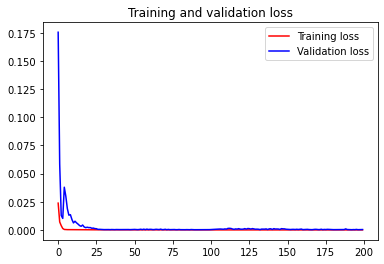

<Figure size 432x288 with 0 Axes>

In [106]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [107]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((1371, 1), (229, 1))

In [108]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [109]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  29.205568535889213
Train data MSE:  852.9652335045221
Train data MAE:  20.344926095374042
-------------------------------------------------------------------------------------
Test data RMSE:  59.91558918777976
Test data MSE:  3589.8778277187907
Test data MAE:  44.75973577374456


In [110]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9958026735426213
Test data explained variance regression score: 0.9612477059471997


Train predicted data:  (1632, 1)
Test predicted data:  (1632, 1)


<AxesSubplot:xlabel='Date'>

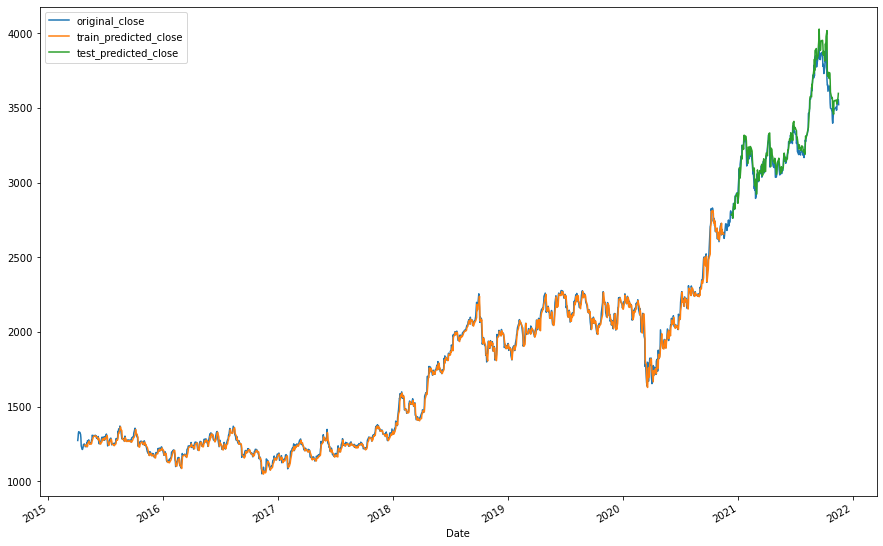

In [111]:
look_back=time_step
trainPredictPlot = np.empty_like(tcs_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(tcs_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tcs_close)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({
                       'original_close': original_df['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plotdf[["original_close", "train_predicted_close", "test_predicted_close"]].plot(figsize=(15, 10))

In [112]:
len(test_data)

245

In [113]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 15)

In [114]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [115]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [116]:
temp_input

[0.837481405555861,
 0.8399435142528402,
 0.8164928663078173,
 0.8082628018134492,
 0.8353463337649549,
 0.8380323240251399,
 0.8408044031778235,
 0.844420136662754,
 0.8454359687799977,
 0.838066793210613,
 0.8394097463051136,
 0.8524436382578366,
 0.8618273275401562,
 0.8628947793644253,
 0.8510145121996537]

In [117]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=15
i=0
while(i<20):
    
    if(len(temp_input)>15):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist()) #Append predicted data to lst_output
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8634741]
16
1 day input [0.83994351 0.81649287 0.8082628  0.83534633 0.83803232 0.8408044
 0.84442014 0.84543597 0.83806679 0.83940975 0.85244364 0.86182733
 0.86289478 0.85101451 0.86347407]
1 day output [[0.87731284]]
2 day input [0.81649287 0.8082628  0.83534633 0.83803232 0.8408044  0.84442014
 0.84543597 0.83806679 0.83940975 0.85244364 0.86182733 0.86289478
 0.85101451 0.86347407 0.87731284]
2 day output [[0.8929277]]
3 day input [0.8082628  0.83534633 0.83803232 0.8408044  0.84442014 0.84543597
 0.83806679 0.83940975 0.85244364 0.86182733 0.86289478 0.85101451
 0.86347407 0.87731284 0.89292771]
3 day output [[0.9086487]]
4 day input [0.83534633 0.83803232 0.8408044  0.84442014 0.84543597 0.83806679
 0.83940975 0.85244364 0.86182733 0.86289478 0.85101451 0.86347407
 0.87731284 0.89292771 0.90864873]
4 day output [[0.92382675]]
5 day input [0.83803232 0.8408044  0.84442014 0.84543597 0.83806679 0.83940975
 0.85244364 0.86182733 0.86289478 0.85101451 0.86347407 0.87731284
 0.892

In [118]:
day_new=np.arange(1,16)
day_pred=np.arange(16,36)

In [119]:
len(tcs_close)

1632

In [120]:
len(lst_output)

20

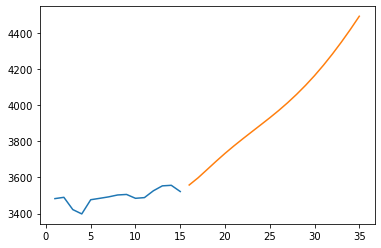

In [121]:
plt.plot(day_new,scaler.inverse_transform(tcs_close[1617:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

1652

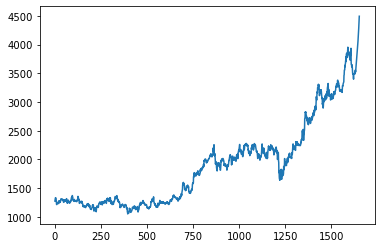

In [122]:
df3=tcs_close.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
len(df3)